<a href="https://colab.research.google.com/github/abdelrhmanwahba/investigate_a_tmdb-movies_dataset/blob/main/investigate_a_tmdb_movies_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate tmdb-movies dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



This dataset was taken from The Movie Database (TMDb), "a community built movie and TV database." (www.themoviedb.org/about) Each
row corresponds to a movie and includes a range of data about each film. Relevant data to be used in the following analysis include the
following variables:
- original title
- genres
- runtime
- budget_adj (budget in terms of 2010 dollars)
- revenue_adj (revenue in terms of 2010 dollars)
In this report, I explore the following questions:
1. Does runtime related to votes?
2. which genre has most poopurality?
3. which genre has most profit?


In [ ]:
#importing needed libraries 
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
#loadding dataset
df = pd.read_csv('/content/drive/MyDrive/fwd/project2/tmdb-movies.csv')

In [ ]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'RunTime_level'],
      dtype='object')

<a id='wrangling'></a>
## Data Wrangling



Now that my data is loaded, I'll make the following changes:

*   exploring and dealing with missing values
*   exploring and removing  duplicated  values
*   split the multivalue field "genre" into multi rows for more valuable insights.
* create new column for runtime, to classfy movie based on duaration : long, med, short 





**exploring and removing  missed  values**

In [ ]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
df['genres'].dropna(inplace=True)

I dropped the missing values in **'genres'** column only , since this is the colmun i intersted in ,in this analysis

**exploring and removing  duplicated  values**

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

**split genres to extract more information**

In [ ]:
# get all columns except genres
no_genres = df.columns.drop('genres').to_list()

#split genres to another rows
genre_split = df.set_index(no_genres).apply(lambda x: x.str.split('|').explode()).reset_index()

In [ ]:
# now genre column has been splited and can extract more info
genre_split['genres'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

now we have another dataframe "genre_split" that contains each genre in row 

**create new column for runtime, to classfy movie based on duaration : long, med, short**


In [ ]:
#get median of runtime
rt_median = df['runtime'].median()
# add 'duration_level' column to indicate level of runtime
# the values will be [ long > rt_median , med == rt_median , short < rt_median]
df.insert(len(df.columns),'RunTime_level',df['runtime'].apply(lambda x : 'long' if x > rt_median else ('med' if x == rt_median else 'short')))


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Does runtime related to votes!)

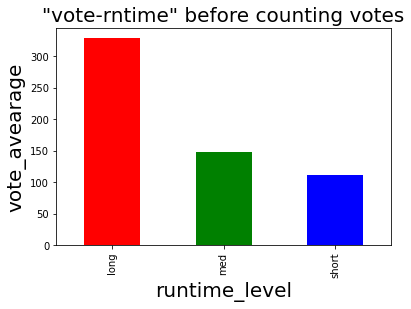

In [ ]:
colors = ['red','green','blue']
df.groupby('RunTime_level')['vote_count'].mean().plot(kind = 'bar',color=colors);
plt.xlabel('runtime_level',fontsize=20);
plt.ylabel('vote_avearage',fontsize=20);
plt.title('"vote-rntime" before counting votes',fontsize=20);

as we can see the number of votes is not the same for each level of runtime(duration), so we need to calcuale the ratio between vote_count and vote_avearage

In [ ]:
# get the ratio between vote_count and vote_avearage for each level
votes= df.groupby('RunTime_level')['vote_average'].mean() / df.groupby('RunTime_level')['vote_count'].mean()

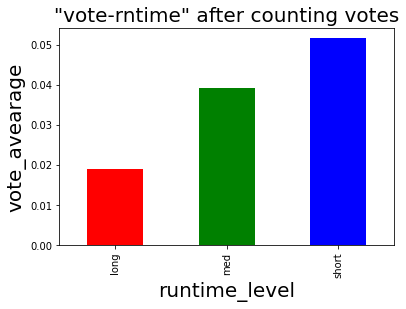

In [ ]:
#plot the ratio between each runtime_level and vote_avearage
votes.plot(kind='bar',color=['red','green','blue']);
plt.xlabel('runtime_level',fontsize=20)
plt.ylabel('vote_avearage',fontsize=20)
plt.title('"vote-rntime" after counting votes',fontsize=20);

as we can see after considering the **counts** of votes for each runtime_level , the graph was inversed

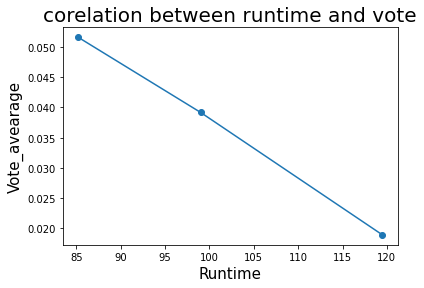

In [ ]:
# draw th relation between  runtime and vote_avearage
plt.plot(df.groupby('RunTime_level')['runtime'].mean(),votes,'-o');
plt.xlabel('Runtime',fontsize=15);
plt.ylabel('Vote_avearage',fontsize=15);
plt.title('corelation between runtime and vote',fontsize=20)
plt.show()

and this graph Confirms our findings above, that is **negative** corelatuin between **level of runtime and average of votes** for the movie,
as long duration movies got lowst votes, but the short movies got the highst


### Research Question 2  (which genre has most poopurality)

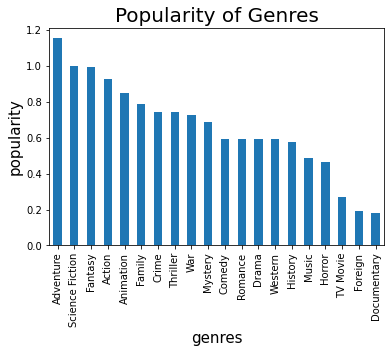

In [ ]:
#draw bar chart for popularity of genres        
popularity = genre_split.groupby('genres')['popularity'].mean()
popularity.sort_values(ascending=False).plot(kind='bar');
plt.xlabel('genres',fontsize=15);
plt.ylabel('popularity',fontsize=15);
plt.title('Popularity of Genres',fontsize=20)
plt.show()

this plot shows us that: 
**adventure** movies is the most popular 

### Question 3  (which genre has most profit)

In [ ]:
#get the mean profit for each genre
profit=genre_split.groupby('genres')['revenue'].mean() - genre_split.groupby('genres')['budget'].mean()

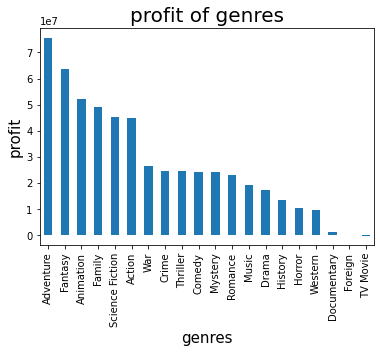

In [ ]:
#draw each genre profit
profit.sort_values(ascending=False).plot(kind='bar');
plt.xlabel('genres',fontsize=15);
plt.ylabel('profit',fontsize=15);
plt.title('profit of genres',fontsize=20)
plt.show()

and this plot shows us that: 
**adventure** movies is the most **profitable** genre of movies

and this make some sense , since this is the most **popular** genre

<a id='conclusions'></a>
## Conclusions

**Results:**

1.   **Research Question 1 (Does runtime related to votes!):**<br>
runtime is ***reverse*** related to vote_average
2.   **Research Question 2 (which genre has most poopurality):** <br>
as we can see *'adventure'* genre is the most popular
3. **Question 3  (which genre has most profit):**<br>
also *'adventure'* genre has the max profit

**Limitation:**
There are a couple of limitations with our data:
1. Most of our variables are categorical, which does not allow for a high level of statistical method that can be used to provide correlations etc
2. The statistics used here are descriptive statistics, not inferential, meaning that we did not create any hypotheses or controlled experiments or
inferences with our data.
3. there are multivalue attributes , which make it difficult to analyse this attributes together and find corelation.
4. Cannot show strong correlations between factors since most of our data is categorical.
